# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import os
import matplotlib.pyplot as plt
import pandas as pd
import requests
import plotly.express as px

# Import API key
from api_keys import geoapify_key
from citipy import citipy

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame

city_data_df = pd.read_csv("../../WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,296.19,84,100,7.55,PN,1714260143
1,papatowai,-46.5619,169.4708,287.38,68,8,1.12,NZ,1714260143
2,saint-felicien,48.6501,-72.4491,288.53,23,100,4.12,CA,1714260143
3,puerto natales,-51.7236,-72.4875,276.13,82,99,10.20,CL,1714260143
4,peace river,56.2501,-117.2860,288.32,30,75,3.09,CA,1714260143


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

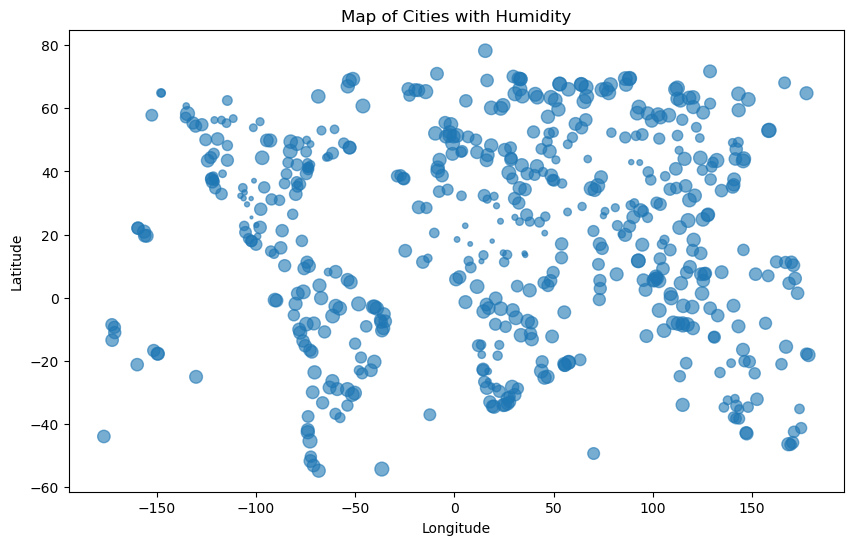

In [3]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE


# Scatter plot of cities with humidity as the size of the points
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lng'], city_data_df['Lat'], s=city_data_df['Humidity'], alpha=0.6)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Cities with Humidity')

# Show the plot
plt.show()

# Display the map
# YOUR CODE HERE

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
# YOUR CODE HERE


# Define criteria for ideal weather conditions
ideal_conditions = city_data_df.query('20 <= `Max Temp` <= 25 and 0 <= `Wind Speed` <= 5 and 7 <= Humidity <= 60')

# Drop rows with null values
ideal_conditions = ideal_conditions.dropna() 

# Display the filtered DataFrame
print(ideal_conditions)


# Drop any rows with null values
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE



# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("../../WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

# Create a new DataFrame hotel_df with selected columns
hotel_df = city_data_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()



# Add an empty column "Hotel Name" to the DataFrame
hotel_df['Hotel Name'] = pd.Series(dtype='object')



# Display sample data of hotel_df
print(hotel_df.head())




# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

                   City Country      Lat       Lng  Humidity Hotel Name
City_ID                                                                
0             adamstown      PN -25.0660 -130.1015        84        NaN
1             papatowai      NZ -46.5619  169.4708        68        NaN
2        saint-felicien      CA  48.6501  -72.4491        23        NaN
3        puerto natales      CL -51.7236  -72.4875        82        NaN
4           peace river      CA  56.2501 -117.2860        30        NaN


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = 10000

# Assign your actual API key to the geoapify_key variable
geoapify_key = "5b9282b994ba4fc292ec1c2e18fabad6"

# Define the API parameters
params = {
    'radius': radius,
    'categories': 'accommodation',  # Search for accommodation type (hotel)
    'apiKey': "5b9282b994ba4fc292ec1c2e18fabad6"
}
    
# Function to get hotel name using Geoapify API
def get_hotel_name(lat, lng):
    # Define the API parameters
    params = {
        'radius': 5000,
        'categories': 'accommodation',
        'apiKey':  "5b9282b994ba4fc292ec1c2e18fabad6"
    }

    # Make API request to Geoapify
    response = requests.get(f'https://api.geoapify.com/v1/places/by-radius?lat={lat}&lon={lng}', params=params)
    data = response.json()
    return data
    
    # Check if there are any results
    if data['features']:
        # Extract the name of the first hotel
        hotel_name = data['features'][0]['properties']['name']
        return hotel_name
    else:
        return None  # No hotel found within the radius

# Apply the function to each row in the DataFrame
hotel_df['Hotel Name'] = hotel_df.apply(lambda row: get_hotel_name(row['Lat'], row['Lng']), axis=1)

# Display the updated DataFrame
print(hotel_df.head())




# Print a message to follow up the hotel search
print("Starting hotel search")




# Iterate through the hotel_df DataFrame
# for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE


# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude and longitude from the DataFrame
    lat = row['Lat']
    lng = row['Lng']
    
    # Now you can use lat and lng in your code for further processing
    print(f"Latitude: {lat}, Longitude: {lng}")


    
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"lat:{lat},lon:{lng}"
    params["bias"] = f"lat:{lat},lon:{lng}"


    
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    


    # Make and API request using the params dictionary
    # Define the API endpoint
    url = 'https://api.geoapify.com/v1/places/by-radius'

    # Make the API request
    response = requests.get(url, params=params)

    # Convert the API response to JSON format
    name_address = response.json()

    # Print the API response
    print(name_address)

    
try:
    if "features" in name_address and name_address["features"]:
        hotel_name = name_address["features"][0]["properties"]["name"]
        # Store hotel_name in hotel_df DataFrame
        hotel_df.loc[index, "Hotel Name"] = hotel_name
    else:
        # Handle case where no features are present in the response
        print("No hotel information found in the API response.")
except KeyError as e:
    # Handle KeyError if the expected keys are missing in the response
    print(f"Error accessing hotel information: {e}")


    


                   City Country      Lat       Lng  Humidity  \
City_ID                                                        
0             adamstown      PN -25.0660 -130.1015        84   
1             papatowai      NZ -46.5619  169.4708        68   
2        saint-felicien      CA  48.6501  -72.4491        23   
3        puerto natales      CL -51.7236  -72.4875        82   
4           peace river      CA  56.2501 -117.2860        30   

                                                Hotel Name  
City_ID                                                     
0        {'statusCode': 404, 'error': 'Not Found', 'mes...  
1        {'statusCode': 404, 'error': 'Not Found', 'mes...  
2        {'statusCode': 404, 'error': 'Not Found', 'mes...  
3        {'statusCode': 404, 'error': 'Not Found', 'mes...  
4        {'statusCode': 404, 'error': 'Not Found', 'mes...  
Starting hotel search
Latitude: -25.066, Longitude: -130.1015
{'statusCode': 404, 'error': 'Not Found', 'message': 'GET /v1/

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

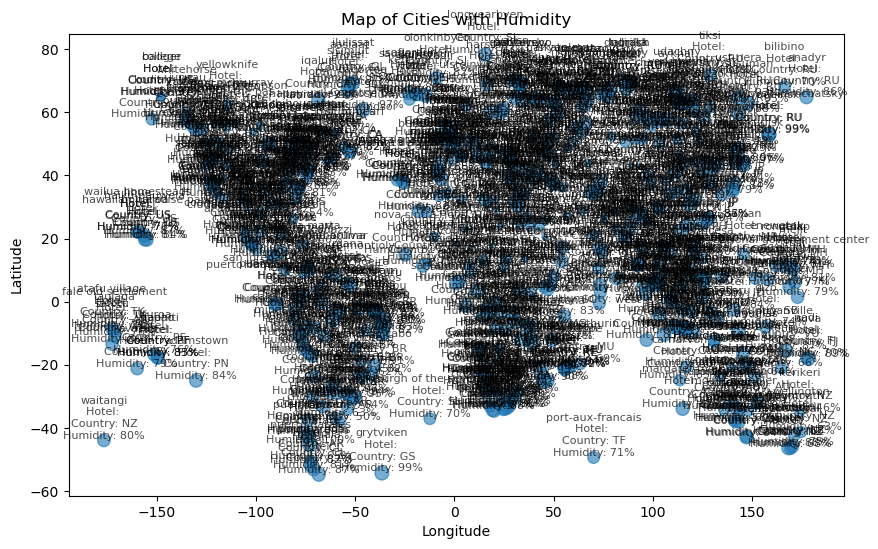

In [10]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE


# Assuming you have created the DataFrame city_data_df from your CSV file
city_data_df['Hotel Name'] = ""


# Create a scatter plot of cities
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lng'], city_data_df['Lat'], s=city_data_df['Humidity'], alpha=0.6)

# Add labels for each city
for index, row in city_data_df.iterrows():
    plt.text(row['Lng'], row['Lat'], f"{row['City']}\nHotel: {row['Hotel Name']}\nCountry: {row['Country']}\nHumidity: {row['Humidity']}%",
             fontsize=8, ha='center', va='bottom', color='black', alpha=0.7)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Cities with Humidity')

# Show the plot
plt.show()